# CC3001 2023-1 - Tarea 6: Quicksort
# Nombre: Roberto Rivera
Profesores: Iván Sipirán, Nelson Baloian, Patricio Poblete




En esta tarea, usted debe comparar el desempeño de la versión original de Quicksort con el de la variante "Mediana de 3". En la primera, el método de partición debe elegir el pivote como el primer elemento del sub arreglo que está particionando. En la segunda, el pivote debe elegirse como la mediana entre el primero, el del medio y el último elemento. Usted debe entregar un link a su tarea en `colab`.

---
# Quicksort original




La versión que se vio en cátedra de Quicksort elige el pivote como un elemento escogido al azar de entre los del arreglo. Para esta tarea vamos a elegir el pivote como el primer elemento del subarreglo para evitar usar la función random.randint() de python que puede ser muy lenta. Dado que para esta tarea los arreglos a ordenar se generarán de manera aleatoria, el primer elemento de la serie se puede ver como un elemento escogido al azar. Sin embargo, esta no es una práctica recomendable en la realidad, ya que si el arreglo viene ordenado, esto llevará a que se tenga el peor caso de Quicksort. La implementación que usaremos de Quicksort es la siguiente:

In [ ]:
qs = 0
qs3 = 0
def quicksort(a):
    comparaciones = 0
    qsort(a,0,len(a)-1)

def qsort(a,i,j):
    if i<j:
        k=particion(a,i,j)
        qsort(a,i,k-1)
        qsort(a,k+1,j)

def particion(a,i,j):
    global qs

    s=i
    for t in range(s,j):
        qs += 1
        if a[t+1]<=a[i]:
            (a[s+1], a[t+1])=(a[t+1], a[s+1])
            s=s+1

    (a[i],a[s])=(a[s],a[i])
    return s

In [ ]:
def chequea_orden(a):
    print("Ordenado" if np.all(a[:-1]<=a[1:]) else "Desordenado")

In [ ]:
import numpy as np
a = np.random.random(30)
print(a)
chequea_orden(a)
quicksort(a)
print(a)
chequea_orden(a)

# La tarea: Quicksort con mediana de tres

Usted debe programar una partición que determine el pivote como la mediana de tres elementos escogido entre el primer, el del medio y el último del segmento a particionar. Para esto, debe modificar el algoritmo de partición de modo que  re-ordene estos 3 elementos dejando en $a[i]$ el mínimo de los 3, en $a[i+1]$ la mediana de los 3 y en $a[j]$ el máximo de los 3. Luego, se aplica el algoritmo de partición ya conocido al segmento $a[i+2],\ldots,a[j-1]$, con $a[i+1]$ como pivote. Al terminar, el pivote se mueve al centro y se retorna su posición.

Otro cambio que se debe hacer es tratar los casos de arreglos de tamaño $0$, $1$ y $2$ como casos de borde, y aplicar ``qsort`` recursivo solo a arreglos de tamaño mayor o igual a 3.

En el siguiente recuadro escriba su algoritmo modificado y luego ejecute las instrucciones de prueba del recuadro siguiente.

In [ ]:
import random

def quicksort3(a):
  qsort3(a,0,len(a)-1)

def qsort3(a,i,j):

  # casos de borde cuando el largo del arreglo es menor a 3, y especialemente
  # cuando j - i == 1, equivalentemente cuando el largo del arreglo sea 2 (pues j = 1 e i = 0),
  # bastará con verificar que estos dos elementos estén ordenados e intercambiarlos
  # si hace falta
  if len(a) < 3:
    if j - i == 1 and a[0] > a[1]:
      (a[0] , a[1]) = (a[1], a[0])
    return

  elif i < j:
    k = particionMedianaDe3(a,i,j)
    qsort3(a,i,k-1)
    qsort3(a,k+1,j)


def particionMedianaDe3(a,i,j):
  global qs3

  # primero tomamos el elemento del medio del arreglo, a[(i+j) // 2], para el
  # caso casi ordenado y lo intercambiamos con la posición de a[i+1]
  (a[i+1], a[(i+j) // 2]) = (a[(i+j) // 2], a[i+1])

  # luego comparamos estos tres elementos entre sí y en caso necesario los
  # intercambiamos para finalmente tener al menor en la posición a[i], al mayor
  # en a[j] y a la mediana en a[i+1]
  if a[i] > a[i+1]:
    (a[i], a[i+1]) = (a[i+1], a[i])
  if a[i] > a[j]:
    (a[i], a[j]) = (a[j], a[i])
  if a[i+1] > a[j]:
    (a[i+1], a[j]) = (a[j], a[i+1])

  # análogo a la partición de quicksort original
  s = i + 1
  for t in range(s, j-1):
    qs3 += 1
    if a[t+1] <= a[i+1]:
      (a[s+1], a[t+1]) = (a[t+1], a[s+1])
      s += 1
  (a[i+1], a[s]) = (a[s], a[i+1])
  return s

In [ ]:
import numpy as np
a = np.random.random(30)
print(a)
chequea_orden(a)
quicksort3(a)
print(a)
chequea_orden(a)

Una vez programada la variante quicksort con mediana de tres, se le pide que mida el tiempo promedio que ambas versiones demoran en ordenar y cuente además el número promedio de comparaciones que se hacen dentro de la función de partición para las dos versiones operando sobre el mismo arreglo. Para eso debe crear arreglos con elementos generados al azar (use `np.random.random(n)`, donde `n` es el número de elementos), hacer una copia de él y ordenar uno con el método quicksort original y el otro con el método de mediana de tres, registrando el tiempo que demora cada ordenamiento y la cantidad de comparaciones. Este proceso debe ejecutarlo 15 veces y sacar el promedio del tiempo y de comparaciones para cada versión para un `n` fijo.

Repita el procedimiento para `n` = 100, 500, 1000, 5000, 10000, 20000 y 40000, completando así una tabla similar a la que se ve a continuación.

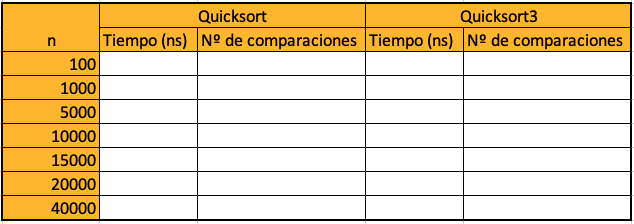


Una vez completada la tabla grafique sus resultados (de la forma que estime más conveniente presentarlos) e incluya el gráfico al final de  este documento. Para tomar el tiempo que demora un proceso puede usar la función `time.gettime_ns(0)` que registra el tiempo actual en nanosegundos que han pasado desde el 1/1/1970 00:00 horas. Puede usarlo de la siguiente manera:

In [ ]:
import time
a = np.random.random(100)

t1 = time.clock_gettime_ns(0)
quicksort(a)
t2 = time.clock_gettime_ns(0)
print("el tiempo que demoró el proceso fue de ",(t2-t1),"nanosegundos")

el tiempo que demoró el proceso fue de  654160 nanosegundos


Para contar las comparaciones puede usar variables globales que se incrementan convenientemente. Solo cuente las comparaciones que se hacen en el proceso de partición (dentro del `for`). Tenga sumo cuidado de asegurarse que cada vez que se corra el experimento (ordenamiento del arreglo generado al azar por los dos métodos) estos reciban una copia del arreglo original desordenado y no una referencia al arreglo que ya fue ordenado en una instancia anterior. Programe las instrucciones que ejecuten el experimento descrito anteriormente, en el siguiente recuadro:

In [ ]:
import numpy as np
import time
ns = [100,1000, 5000, 10000, 15000, 20000, 40000]

# se resetean las variables globales qs y qs3 que cuentan la cantidad de comparaciones
# de cada algoritmo y se crea una lista para almacenar los resultados
qs, qs3 = 0, 0
res = []

# para cada valor de n en la lista entregada:
for n in ns:
  # se resetean los contadores de comparaciones y se crean contadores de tiempo
  # locales inicializados en 0
  qs, qs3 = 0, 0
  tiempo, tiempo3 = 0, 0

  # se realiza el test unas 15 veces para cada n
  for i in range(0, 15):

    # se crea un arreglo random de tamaño n y se copia en b con el método copy()
    a = np.random.random(n)
    b = a.copy()

    # se toma el tiempo de una ejecución de quicksort para el arreglo a
    # y se suma al contador de tiempo total para este valor de n
    t1 = time.clock_gettime_ns(0)
    quicksort(a)
    t2 = time.clock_gettime_ns(0)
    tiempo += (t2-t1)

    # lo mismo para quicksort3 sobre el arreglo copia b con su propio contador
    # de tiempo total
    t3 = time.clock_gettime_ns(0)
    quicksort3(b)
    t4 = time.clock_gettime_ns(0)
    tiempo3 += (t4-t3)

  # finalmente se guarda en la lista de resultados una lista que contiene el valor
  # de n para el que se realizó el test junto a las comparaciones y tiempos promedio
  # de cada algoritmo, simplemente dividiendo estos valores por 15. cuando el test
  # se ejecute para el siguiente valor de n, los contadores de comparaciones y tiempo
  # se resetearán a 0
  res.append([n, qs//15, tiempo//15, qs3//15, tiempo3//15])

# TABLA Y GRÁFICO FINAL


In [ ]:
import pandas as pd

pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 1000)
data = res
columns = ["n", "Comparaciones Quicksort", "Tiempo Quicksort", "Comparaciones Quicksort3", "Tiempo Quicksort3"]
df = pd.DataFrame(data, columns=columns)
print(df.to_string(index=False))

    n  Comparaciones Quicksort  Tiempo Quicksort  Comparaciones Quicksort3  Tiempo Quicksort3
  100                      646            412705                       462             345463
 1000                    10848           4411032                      8237            4245739
 5000                    72948          30531233                     56394           28899707
10000                   153778          59645012                    121256           56331044
15000                   245140         124605228                    193826          118366473
20000                   345567         131182405                    272789          122642459
40000                   722526         304559962                    582013          294557008


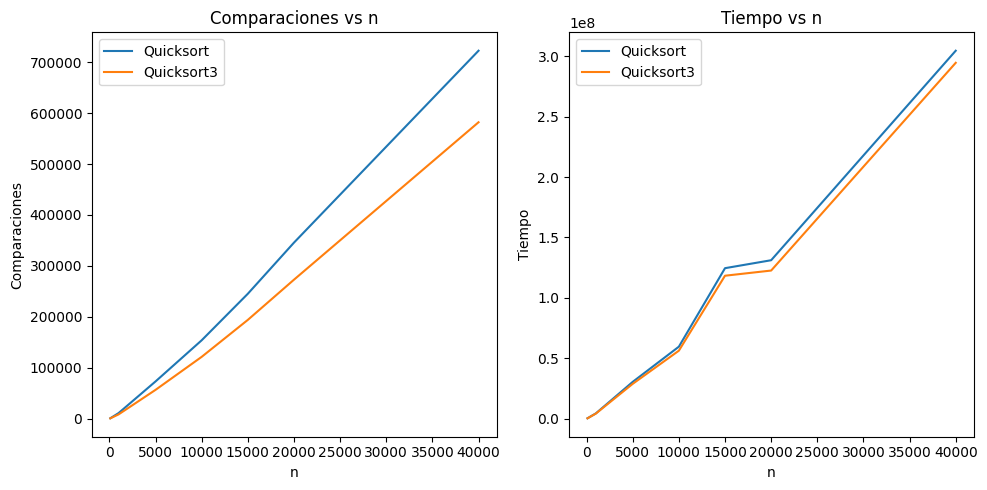

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(df['n'], df['Comparaciones Quicksort'], label='Quicksort')
ax1.plot(df['n'], df['Comparaciones Quicksort3'], label='Quicksort3')
ax1.set_xlabel('n')
ax1.set_ylabel('Comparaciones')
ax1.set_title('Comparaciones vs n')
ax1.legend()
ax2.plot(df['n'], df['Tiempo Quicksort'], label='Quicksort')
ax2.plot(df['n'], df['Tiempo Quicksort3'], label='Quicksort3')
ax2.set_xlabel('n')
ax2.set_ylabel('Tiempo')
ax2.set_title('Tiempo vs n')
ax2.legend()
plt.tight_layout()
plt.show()